<a href="https://colab.research.google.com/github/Sivaganesh25/Machine-Learning/blob/main/2_5_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import KFold,RepeatedStratifiedKFold, StratifiedKFold, StratifiedShuffleSplit, cross_val_score, LeaveOneOut, cross_validate, cross_val_predict, GroupKFold

In [ ]:
data=pd.read_csv('Iris.csv')

In [ ]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data_points=data.iloc[:,1:5]
labels=data.iloc[:,5]
x_train,x_test,y_train,y_test = train_test_split(data_points,labels,test_size=0.2)

In [ ]:
labels

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [ ]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [ ]:
from sklearn import preprocessing
 
features = data.columns.difference(['Species'])
X = data[features].values
y = data['Species'].values

label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
features

Index(['Id', 'PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm'], dtype='object')

In [ ]:
RepeatedStratifiedKFold,
# spot check algorithms
models=[]
models.append(('LR',LogisticRegression(max_iter=1000)))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DSC',DecisionTreeClassifier(random_state=1,max_depth=2)))
models.append(('SVC',SVC()))

#evaluate each model in turn
results=[]
names=[]

for name,model in models:
  kfold=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
  cv_results=cross_val_score(model,X,y,cv=kfold,scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg="%s:%.2f(%.3f)"%(name,cv_results.mean(),cv_results.std())
  print(msg)

LR:1.00(0.000)
LDA:1.00(0.000)
KNN:1.00(0.012)
DSC:0.99(0.020)
SVC:0.99(0.020)


In [ ]:
models

[('LR', LogisticRegression(max_iter=1000)),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('DSC', DecisionTreeClassifier(max_depth=2, random_state=1)),
 ('SVC', SVC())]

Text(0.5, 1.0, 'Mean accuracies between the best two selected algorithms')

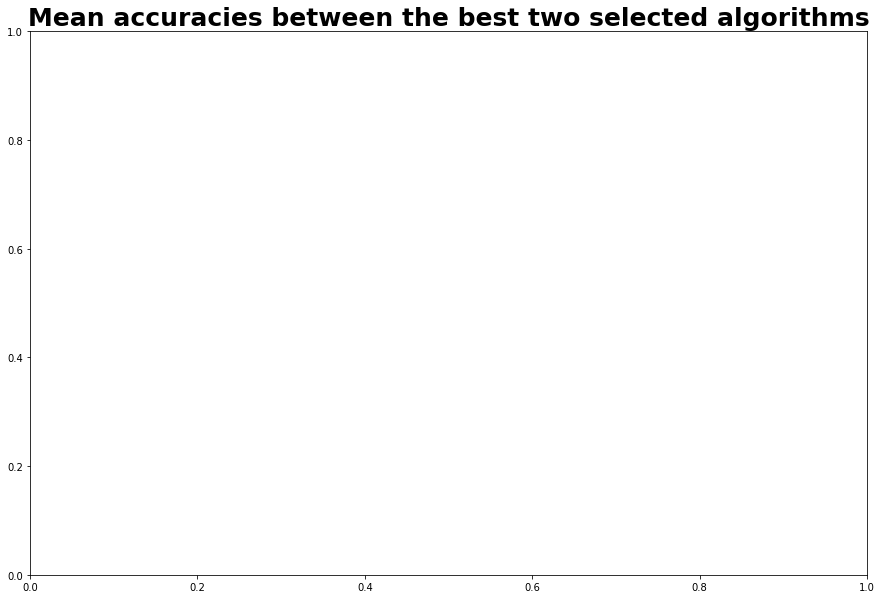

In [ ]:
plt.figure(figsize=(15,10))
plt.grid(False)
plt.title("Mean accuracies between the best two selected algorithms",fontsize=25,fontweight='bold')

Hypothesis testing for model choosing 

H0: Both models have the same performance on the dataset.

H1: Both models doesn’t have the same performance on the dataset.

Significance level is 0.05

LDA Mean Accuracy:100.0% +/-(0.000)
SVC Accuracy: 99.0% +/-(0.024)


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


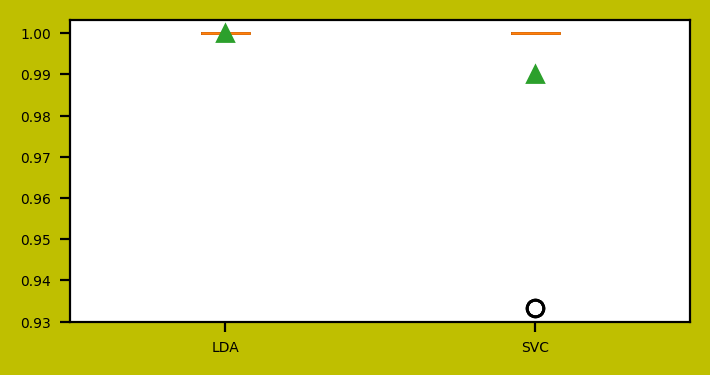

In [ ]:
# evaluate model1
model1=LinearDiscriminantAnalysis()
cv1=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
scores1=cross_val_score(model1,X,y,scoring='accuracy',cv=cv1,n_jobs=-1)
print('LDA Mean Accuracy:%.1f%% +/-(%.3f)'%(np.mean(scores1*100),np.std(scores1)))

model2 = SVC()
cv2 = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 2, random_state = 1)
scores2 = cross_val_score(model2, X, y, scoring = 'accuracy', cv = cv2, n_jobs = -1)
print('SVC Accuracy: %.1f%% +/-(%.3f)' % (np.mean(scores2*100), np.std(scores2)))

# plot the results
plt.rcParams.update({'font.size':5})
fig=plt.figure(num=None,figsize=(4,2),dpi=200,facecolor='y',edgecolor='red')
plt.boxplot([scores1,scores2],labels=['LDA','SVC'],showmeans=True)
plt.show()

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv
# check if difference between algorithms is real
t,p=paired_ttest_5x2cv(estimator1=model1,estimator2=model2,X=X,y=y,scoring='accuracy',random_seed=1)

# summarize
print(f'The p-value is={p:.3f}')
print(f'The t-statistic is={t:.3f}')

# interpret the result
if p<0.05:
  print("since p<0.05 we can reject the null hypothesis that both models perform equally well on this dataset.we conclude that two algorithms are significantly different ")
else:
  print("since p<0.05 we can accept the null hypothesis that both models perform equally well on this dataset.we conclude that two algorithms are not significantly different ")


The p-value is=1.000
The t-statistic is=0.000
since p<0.05 we can accept the null hypothesis that both models perform equally well on this dataset.we conclude that two algorithms are not significantly different 
